In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)
import plotly.express as px

# import the KNNimputer class
from sklearn.impute import KNNImputer

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Prifina/Appointments.csv")

In [ ]:
df.shape

(203, 7)

In [ ]:
df.head()

,date,no_of_days to appointment,appointment_date,appointment_time,priority_level,type_of_client,appointment_completion
0,1/1/2022,2,1/3/2022,14.30,High,New,Completed
1,1/1/2022,5,1/6/2022,10.30,Low,New,Completed
2,1/2/2022,4,1/6/2022,12.15,High,Existing,Not Completed
3,1/2/2022,1,1/3/2022,10.30,High,Existing,Completed
4,1/2/2022,8,1/10/2022,10.30,High,Official,Completed


In [ ]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 7)


In [ ]:
df.isnull().values.ravel().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       203 non-null    object 
 1   no_of_days to appointment  203 non-null    int64  
 2   appointment_date           203 non-null    object 
 3   appointment_time           203 non-null    float64
 4   priority_level             203 non-null    object 
 5   type_of_client             203 non-null    object 
 6   appointment_completion     203 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 11.2+ KB


In [ ]:
#replacing values in priority level
df['priority_level'].replace(['High','Medium','Low'],
		[1,2,3], inplace=True)

In [ ]:
#replacing values in type of client
df['type_of_client'].replace(['New','Existing','Official','Personal'],
		[1,2,3,4], inplace=True)

In [ ]:
#replacing values in appointment completion
df['appointment_completion'].replace(['Completed','Not Completed'],
		[1,0], inplace=True)

In [ ]:
df.head()

,date,no_of_days to appointment,appointment_date,appointment_time,priority_level,type_of_client,appointment_completion
0,1/1/2022,2,1/3/2022,14.30,1,1,1
1,1/1/2022,5,1/6/2022,10.30,3,1,1
2,1/2/2022,4,1/6/2022,12.15,1,2,0
3,1/2/2022,1,1/3/2022,10.30,1,2,1
4,1/2/2022,8,1/10/2022,10.30,1,3,1


In [ ]:
import seaborn as sb

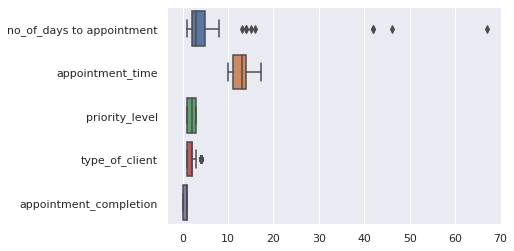

In [ ]:
sb.boxplot (data = df, orient = "h")
plt.show()

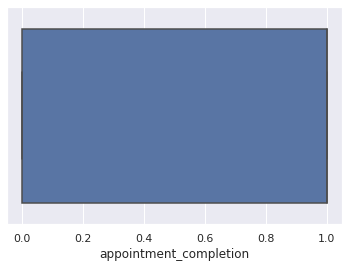

In [ ]:
sns.boxplot(x=df['appointment_completion'])

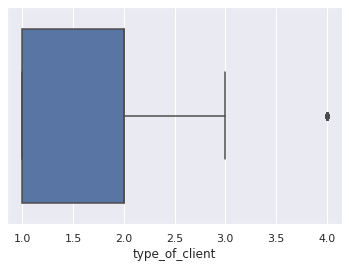

In [ ]:
sns.boxplot(x=df['type_of_client'])

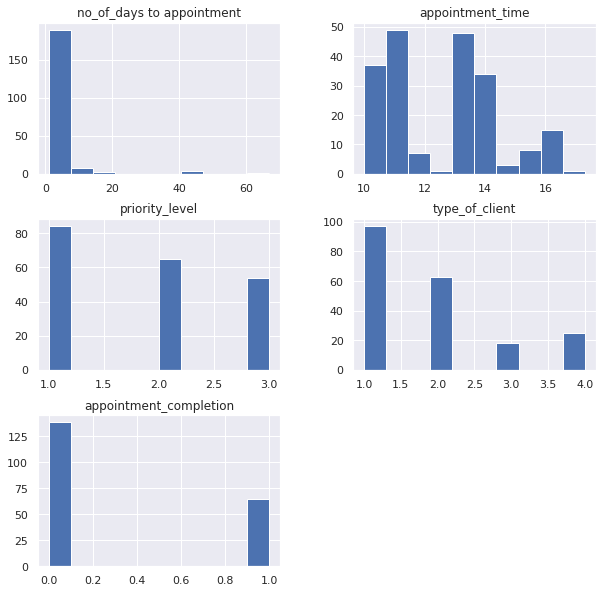

In [ ]:
h = df.hist(figsize=(10,10))

In [ ]:
df['appointment_completion'].value_counts().sort_values(ascending=False)

1    138
0     65
Name: appointment_completion, dtype: int64

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
# converting to datatime datatype
df['date'] = pd.to_datetime(df['date'])

In [ ]:
# converting to datatime datatype
df['appointment_date'] = pd.to_datetime(df['appointment_date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       203 non-null    datetime64[ns]
 1   no_of_days to appointment  203 non-null    int64         
 2   appointment_date           203 non-null    datetime64[ns]
 3   appointment_time           203 non-null    float64       
 4   priority_level             203 non-null    int64         
 5   type_of_client             203 non-null    int64         
 6   appointment_completion     203 non-null    int64         
dtypes: datetime64[ns](2), float64(1), int64(4)
memory usage: 11.2 KB


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

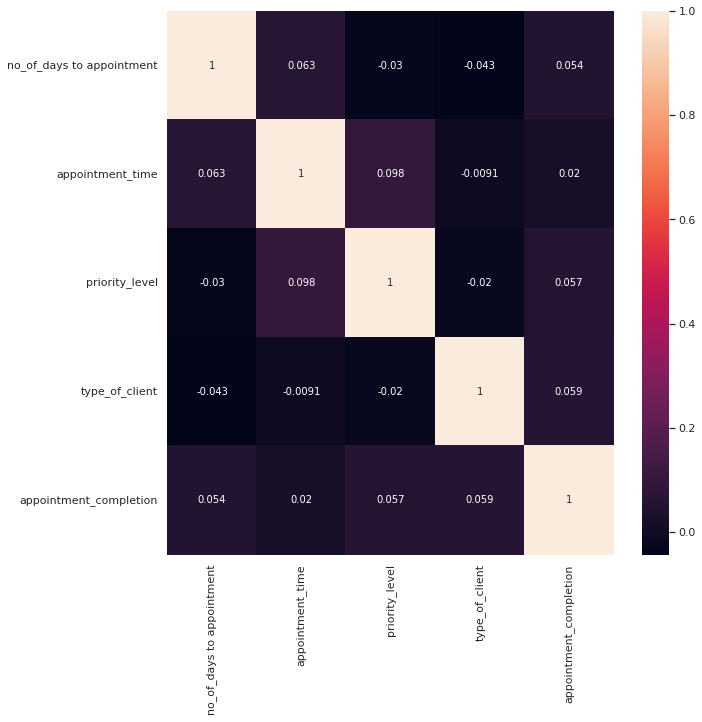

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
corr1 = df.corr()
corr1
sns.heatmap(corr1,annot=True)

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn import metrics

In [ ]:
X = np.array(df[['no_of_days to appointment','appointment_time','priority_level','type_of_client']])
X.shape

(203, 4)

In [ ]:
y = np.array(df[['appointment_completion']])

In [ ]:
kf = KFold(n_splits=5)
kf.get_n_splits(X)

print(kf)

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

KFold(n_splits=5, random_state=None, shuffle=False)
TRAIN: [ 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58
  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76
  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94
  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112
 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130
 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148
 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166
 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184
 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202] TEST: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  3

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7


In [ ]:
from sklearn.metrics import classification_report
target_names = ['0', '1']
print(classification_report(y_test, y_pred,target_names=target_names))

              precision    recall  f1-score   support

           0       0.53      0.62      0.57        13
           1       0.80      0.74      0.77        27

    accuracy                           0.70        40
   macro avg       0.67      0.68      0.67        40
weighted avg       0.71      0.70      0.70        40



In [ ]:
y_pred_proba = clf.predict_proba(X_test)[::,1]

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

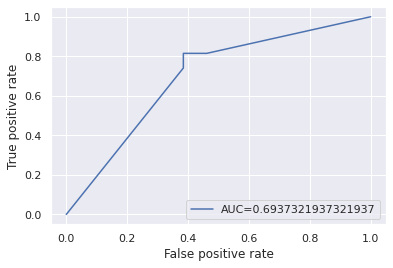

In [ ]:
# create ROC curve 
plt.plot(fpr, tpr, label="AUC="+str(auc))
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend(loc=4)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# generate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

In [ ]:
print("Confusion matrix:")
print(conf_mat)

Confusion matrix:
[[ 8  5]
 [ 7 20]]


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

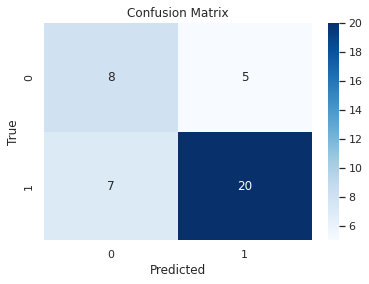

In [ ]:
# plot the confusion matrix using seaborn
sns.heatmap(conf_mat, annot=True, cmap="Blues")
# add labels and title to the plot
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# display the plot
plt.show()

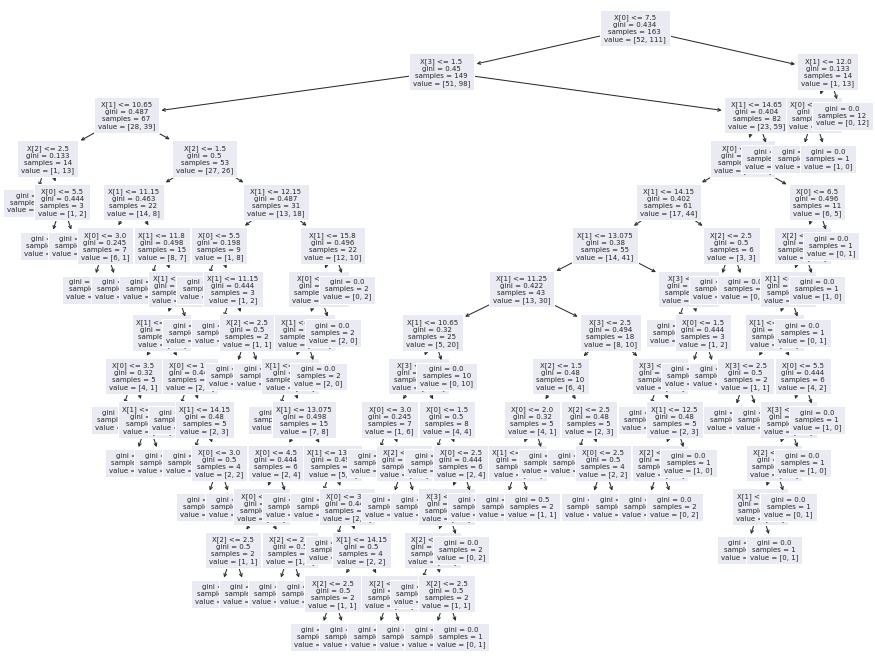

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,12))  
tree.plot_tree(clf, fontsize=7)
plt.show()

In [ ]:
pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.tree import export_graphviz
from io import StringIO  
from IPython.display import Image  
import pydotplus




In [ ]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.575


In [ ]:
from sklearn.metrics import classification_report
target_names = ['0', '1']
print(classification_report(y_test, y_pred,target_names=target_names))

              precision    recall  f1-score   support

           0       0.36      0.38      0.37        13
           1       0.69      0.67      0.68        27

    accuracy                           0.57        40
   macro avg       0.52      0.53      0.52        40
weighted avg       0.58      0.57      0.58        40



In [ ]:
y_pred_proba = knn.predict_proba(X_test)[::,1]

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

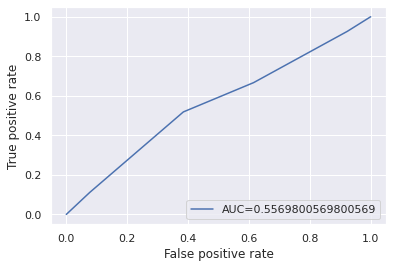

In [ ]:
# create ROC curve 
plt.plot(fpr, tpr, label="AUC="+str(auc))
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend(loc=4)
plt.show()

In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.65


In [ ]:
from sklearn.metrics import classification_report
target_names = ['0', '1']
print(classification_report(y_test, y_pred,target_names=target_names))

              precision    recall  f1-score   support

           0       0.40      0.15      0.22        13
           1       0.69      0.89      0.77        27

    accuracy                           0.65        40
   macro avg       0.54      0.52      0.50        40
weighted avg       0.59      0.65      0.59        40



In [ ]:
y_pred_proba=gnb.predict(X_test)

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

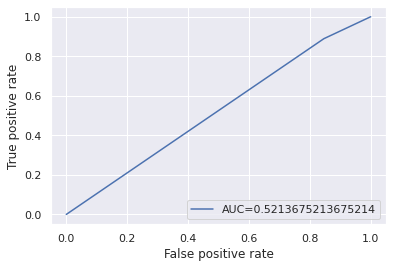

In [ ]:
# create ROC curve 
plt.plot(fpr, tpr, label="AUC="+str(auc))
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend(loc=4)
plt.show()

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

#y_pred_proba=clf.predict(X_test)
y_pred = clf.predict(X_test)


<ipython-input-30-3a87a8ecde9d>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


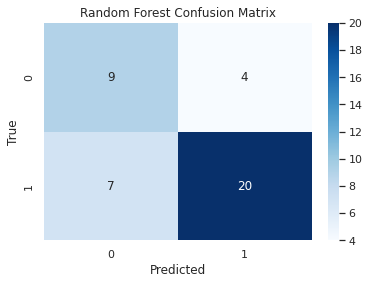

In [ ]:
# Generate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
sns.heatmap(conf_mat, annot=True, cmap="Blues")

# Add labels and title to the plot
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest Confusion Matrix')

# Display the plot
plt.show()

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.675


In [ ]:
from sklearn.metrics import classification_report
target_names = ['0', '1']
print(classification_report(y_test, y_pred,target_names=target_names))

              precision    recall  f1-score   support

           0       0.50      0.62      0.55        13
           1       0.79      0.70      0.75        27

    accuracy                           0.68        40
   macro avg       0.65      0.66      0.65        40
weighted avg       0.70      0.68      0.68        40



In [ ]:
y_pred_proba = clf.predict_proba(X_test)[::,1]

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

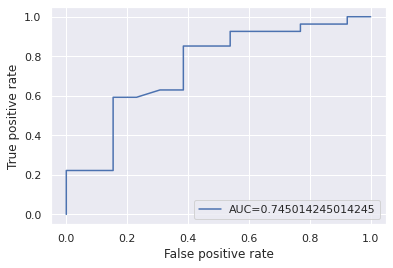

In [ ]:
# create ROC curve 
plt.plot(fpr, tpr, label="AUC="+str(auc))
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend(loc=4)
plt.show()

In [ ]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=7)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.475


In [ ]:
from sklearn.metrics import classification_report
target_names = ['0', '1']
print(classification_report(y_test, y_pred,target_names=target_names))

              precision    recall  f1-score   support

           0       0.10      0.08      0.09        13
           1       0.60      0.67      0.63        27

    accuracy                           0.48        40
   macro avg       0.35      0.37      0.36        40
weighted avg       0.44      0.47      0.45        40



In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#test
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)
y_pred_proba = logreg.predict_proba(X_test)[::,1]

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

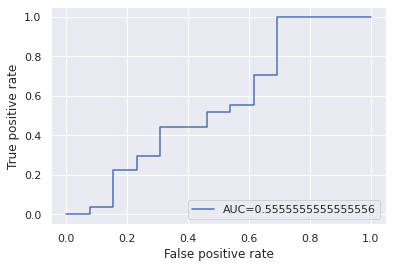

In [ ]:
# create ROC curve 
plt.plot(fpr, tpr, label="AUC="+str(auc))
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend(loc=4)
plt.show()

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.675


In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)

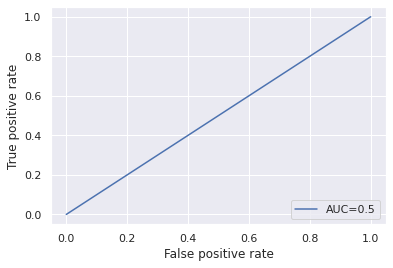

In [ ]:
# create ROC curve
plt.plot(fpr, tpr, label="AUC="+str(auc))
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend(loc=4)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
target_names = ['0', '1']
print(classification_report(y_test, y_pred,target_names=target_names))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.68      1.00      0.81        27

    accuracy                           0.68        40
   macro avg       0.34      0.50      0.40        40
weighted avg       0.46      0.68      0.54        40



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 9,  4],
       [ 6, 21]])

Text(0.5, 257.44, 'Predicted label')

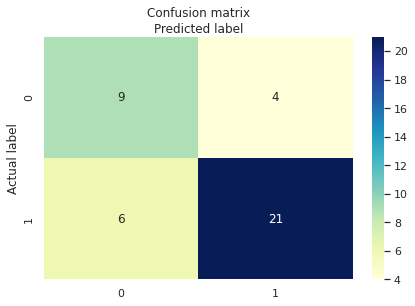

In [ ]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1,2] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.model_selection import train_test_split
#split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#create a new random forest classifier
rf = RandomForestClassifier()
#create a dictionary of all values we want to test for n_estimators
params_rf = {‘n_estimators’: [1,0]}
#use gridsearch to test all values for n_estimators
rf_gs = GridSearchCV(rf, params_rf, cv=5)
#fit model to training data
rf_gs.fit(X_train, y_train)

SyntaxError: ignored

In [ ]:
# improve accuracy
# Import necessary libraries
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# Initialize individual model
model = RandomForestClassifier()

In [ ]:
# Initialize ensemble model with bagging
ensemble_model = BaggingClassifier(base_estimator=model, n_estimators=10, random_state=42)


In [ ]:
# Fit ensemble model on training data
ensemble_model.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=RandomForestClassifier(), random_state=42)

In [ ]:
# Make predictions on testing data
y_pred = ensemble_model.predict(X_test)

In [ ]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy score
print("Accuracy:", accuracy)

Accuracy: 0.65


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# create individual models
model1 = DecisionTreeClassifier(random_state=42)
model2 = KNeighborsClassifier()
model3 = LogisticRegression(random_state=42)

In [ ]:
# create an ensemble model with the individual models
ensemble = VotingClassifier(estimators=[('dt', model1), ('knn', model2), ('lr', model3)], voting='hard')


In [ ]:
# fit the ensemble model on the training data
ensemble.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


VotingClassifier(estimators=[('dt', DecisionTreeClassifier(random_state=42)),
                             ('knn', KNeighborsClassifier()),
                             ('lr', LogisticRegression(random_state=42))])

In [ ]:
# predict using the ensemble model
y_pred = ensemble.predict(X_test)

In [ ]:
# calculate accuracy score of the ensemble model
acc_score = accuracy_score(y_test, y_pred)

print(f"Accuracy of the ensemble model: {acc_score}")

Accuracy of the ensemble model: 0.7
